In [1]:
#data preprocessing
import numpy as np

label_dict = {'NO': 0, 'AB': 1}
data_0 = []
data_1 = []

with open('vertebral_column_data/column_2C.dat', 'r') as f:
    data = f.readlines()

    for line in data:
       odom = line.strip().split()
       if (label_dict[odom[-1]] == 0) :
           data_0.append(list(map(float, odom[0:-1])))
       elif (label_dict[odom[-1]] == 1) :
           data_1.append(list(map(float, odom[0:-1])))

data_Trans0 = np.transpose(data_0)
data_Trans1 = np.transpose(data_1)

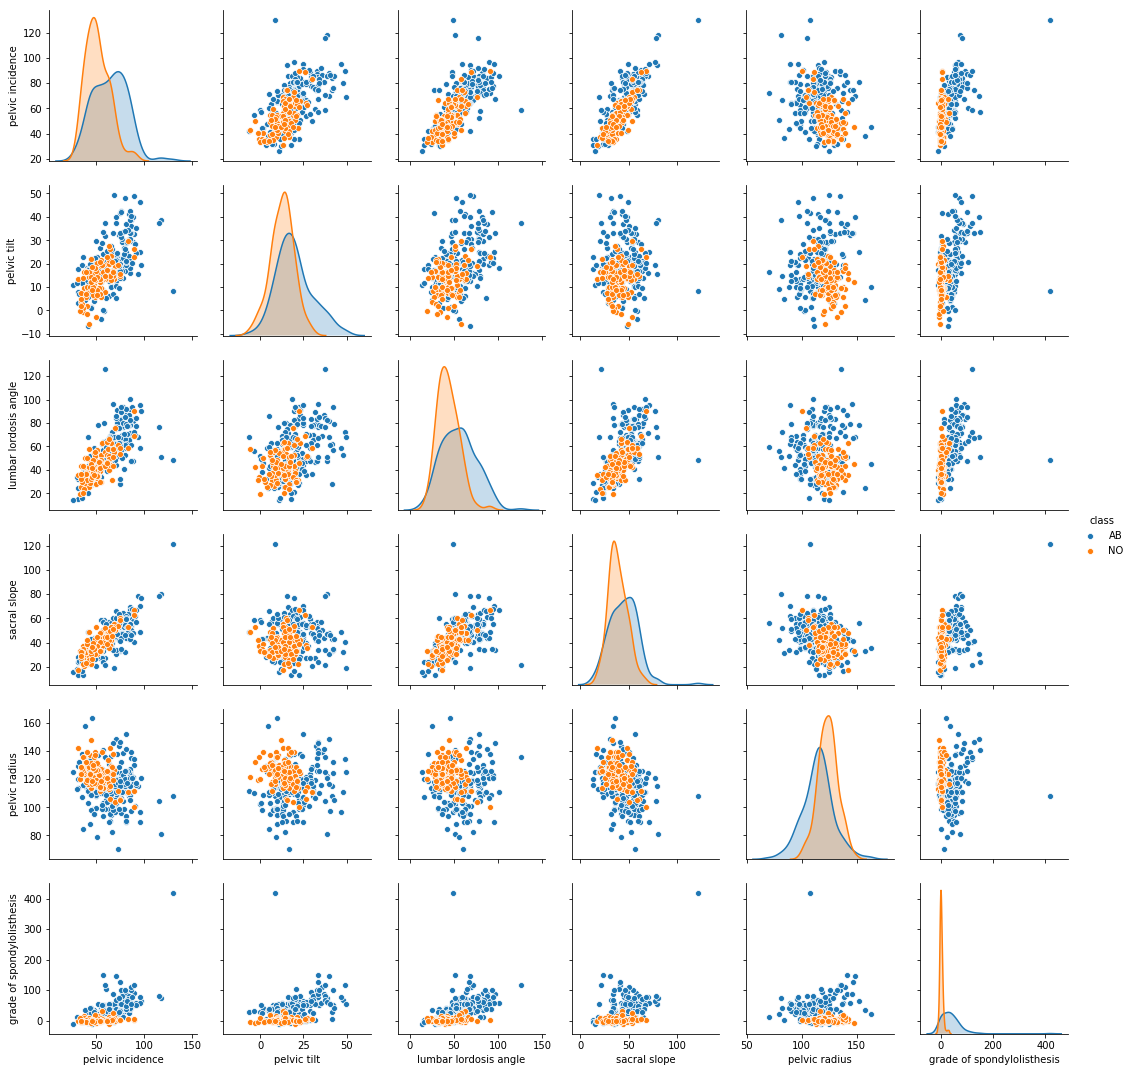

In [3]:
#scatterplots
import pandas as pd
import seaborn as sns

dataFrame = pd.read_csv('vertebral_column_data/column_2C.dat', header = None, sep = ' ')
dataFrame.columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius' ,'grade of spondylolisthesis', 'class']

sns.pairplot(dataFrame, hue = 'class')

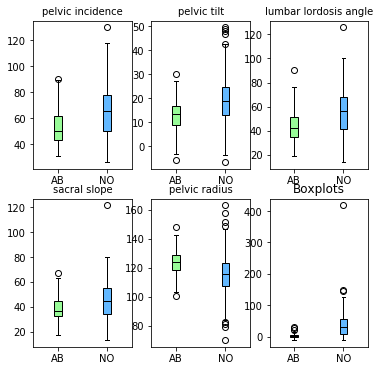

In [19]:
# boxplots
import matplotlib.pyplot as plt
labels = ['AB', 'NO']
fs = 10  # fontsize

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

variablename = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius' ,'grade of spondylolisthesis']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
for i in range(2):
    for j in range(3):
        box=axes[i, j].boxplot([data_Trans0[j+3*i],data_Trans1[j+3*i]], labels=labels, meanline=True,patch_artist=True)
        axes[i, j].set_title(variablename[j+3*i], fontsize=fs)
        box['boxes'][0].set(facecolor='#98FB98')
        box['boxes'][1].set(facecolor='#63B8FF')
        for x in box['medians']:
            x.set(color='black')

plt.title('Boxplots')
plt.show()

In [3]:
#train_test_split
data0_train = data_0[0:70]
data0_test = data_0[70:]
data1_train = data_1[0:140]
data1_test = data_1[140:]
#print(data0_train)
with open('train_set.txt', 'w') as f:
    for i in data0_train :
        for x in i:
            f.write(str(x)+' ')
        f.write('0\n')  # label
    for i in data1_train :
        for x in i:
            f.write(str(x)+' ')
        f.write('1\n')

with open('test_set.txt', 'w') as f:
    for i in data0_test :
        for x in i:
            f.write(str(x)+' ')
        f.write('0\n')
    for i in data1_test :
        for x in i:
            f.write(str(x)+' ')
        f.write('1\n')
        
print(len(data0_train + data1_train))
print(len(data0_test + data1_test))

210
100
